# importing some needed library

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import seaborn as sns

# Here Reading Some Images

In [31]:
img= plt.imread("/content/drive/MyDrive/opencv/data/train/leakage/6.jpg")


<function matplotlib.pyplot.show>

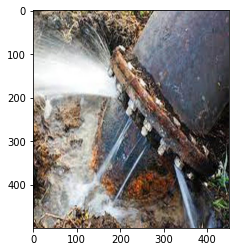

In [32]:
plt.imshow(img)
plt.show


# For Labeling we have to import  some necessary library

In [36]:
import tensorflow 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [37]:
train=  ImageDataGenerator(rescale=1/255)
validation= ImageDataGenerator(rescale=1/255)


In [38]:
train_set = train.flow_from_directory("/content/drive/MyDrive/opencv/data/train/",
                                          target_size=(450,500),
                                          batch_size=5 ,
                                          class_mode='binary')
validation_set=validation.flow_from_directory("/content/drive/MyDrive/opencv/data/validate/",
                                                  target_size=(450,500),
                                                  batch_size=5 ,
                                                  class_mode='binary')

Found 70 images belonging to 2 classes.
Found 73 images belonging to 2 classes.


# for checking lables

In [23]:
train_set.class_indices,validation_set.class_indices

({'leakage': 0, 'non leakage': 1}, {'leakage': 0, 'non leakage': 1})

In [25]:
train_set.classes


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

## Formation Of Artificial Neural Netwok

In [40]:
model = tensorflow.keras.models.Sequential([tensorflow.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(450,500,3)),
                                            tensorflow.keras.layers.MaxPool2D(2,2),
                                            tensorflow.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(450,500,3)),
                                            tensorflow.keras.layers.MaxPool2D(2,2),
                                            tensorflow.keras.layers.Flatten(),
                                            tensorflow.keras.layers.Dense(512,activation='relu'),
                                            tensorflow.keras.layers.Dense(1,activation='sigmoid')
                                            
                                            ])

In [41]:
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fa33c1bebd0>>

In [42]:
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

In [43]:
model.fit(train_set,steps_per_epoch=5,epochs=12,
          validation_data=validation_set)

Epoch 1/12
5/5 [==============================] - 56s 12s/step - loss: 25.5543 - accuracy: 0.6744 - val_loss: 1.8947 - val_accuracy: 0.7945
Epoch 2/12
5/5 [==============================] - 30s 6s/step - loss: 0.6188 - accuracy: 0.8150 - val_loss: 2.8381 - val_accuracy: 0.6712
Epoch 3/12
5/5 [==============================] - 31s 6s/step - loss: 1.4482 - accuracy: 0.7522 - val_loss: 0.6131 - val_accuracy: 0.8630
Epoch 4/12
5/5 [==============================] - 32s 7s/step - loss: 0.4799 - accuracy: 0.8544 - val_loss: 1.1919 - val_accuracy: 0.7671
Epoch 5/12
5/5 [==============================] - 31s 6s/step - loss: 0.9033 - accuracy: 0.9506 - val_loss: 0.7176 - val_accuracy: 0.8630
Epoch 6/12
5/5 [==============================] - 29s 6s/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.4017 - val_accuracy: 0.8767
Epoch 7/12
5/5 [==============================] - 29s 6s/step - loss: 2.0984e-04 - accuracy: 1.0000 - val_loss: 0.2792 - val_accuracy: 0.9041
Epoch 8/12
5/5 [============

7.jpg


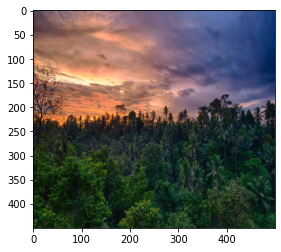

leakage is not  found
8.jpg


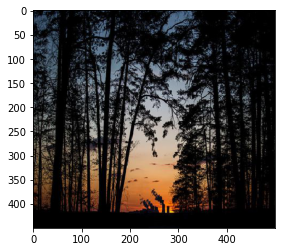

leakage is not  found
6.jpg


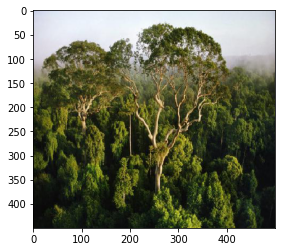

leakage is not  found
5.jpg


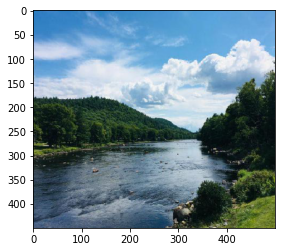

leakage is not  found
43.jpg


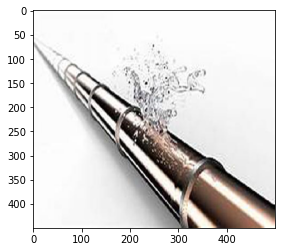

leakage is found
44.jpg


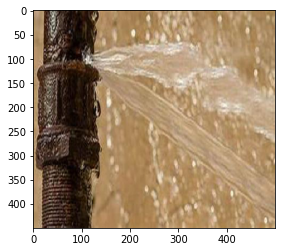

leakage is found
45.jpg


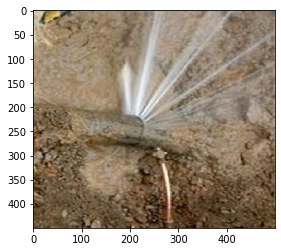

leakage is found
46.jpg


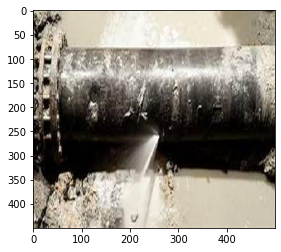

leakage is found
47.jpg


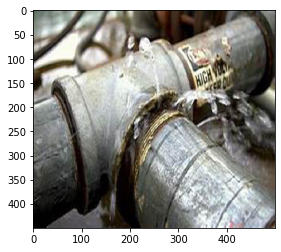

leakage is found
50.jpg


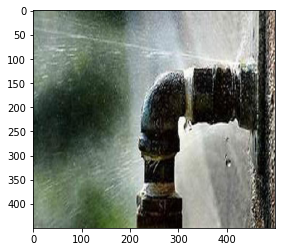

leakage is found
48.jpg


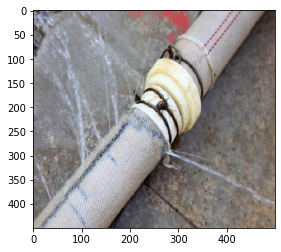

leakage is found
49.jpg


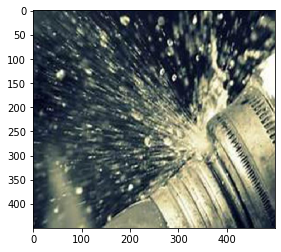

leakage is found


In [45]:
import os
dir_path='/content/drive/MyDrive/opencv/data/test/'
for i in os.listdir(dir_path):
  print(i)
  img= image.load_img(dir_path+'//'+i,target_size=(450,500))
  plt.imshow(img)
  plt.show()
  z= image.img_to_array(img)
  z=np.expand_dims(z,axis=0)
  images= np.vstack([z])
  val= model.predict(images)
  if val==0:
    print("leakage is found")
  else:
      print("leakage is not  found")

In [47]:
path="/content/drive/MyDrive/opencv/leakage_detection_project.h5"
model.save(path)